In [17]:
library(tidyverse)
theme_set(theme_classic())
options(repr.plot.width  = 10, repr.plot.height = 6)
set.seed(1)

# STATS 504
## Week 12: Survival Analysis

Survival analysis is a branch of statistics that studies the occurrence and timing of random events.
- How long until the patient relapses?
- How long until the hard drive fails?
- How long until the next earthquake in CA?

In [173]:
## Example dataset
library(survival)
help(lung)

In [172]:
# lung data

lung

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,1,74,1,1,90,100,1175,NA
2,3,455,1,68,1,0,90,90,1225,15
3,3,1010,0,56,1,0,90,90,NA,15
4,5,210,1,57,1,1,90,60,1150,11
5,1,883,1,60,1,0,100,90,NA,0
6,12,1022,0,74,1,1,50,80,513,0
7,7,310,1,68,2,2,70,60,384,10
8,11,361,1,71,2,2,60,80,538,1
9,1,218,1,53,1,1,70,80,825,16


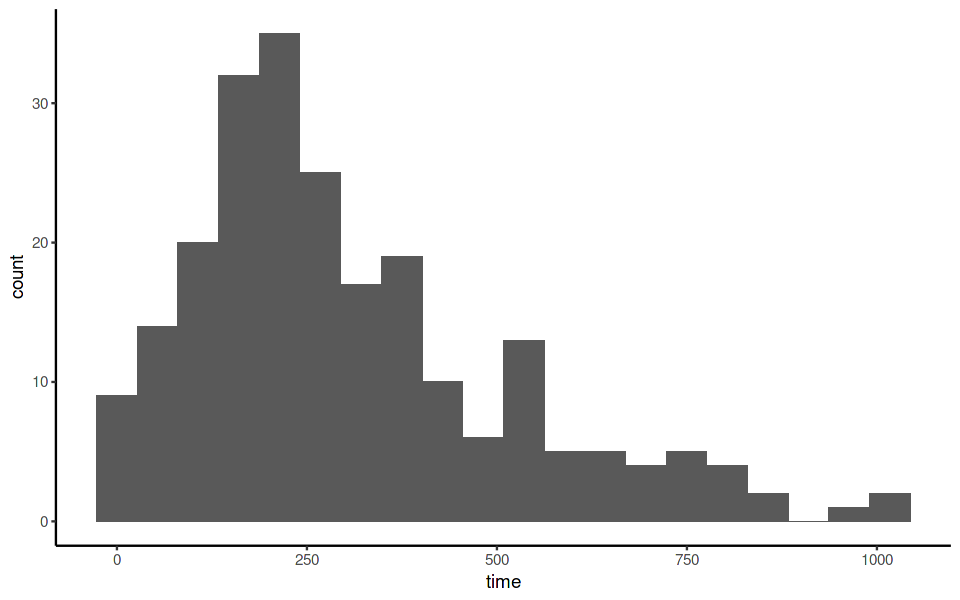

In [27]:
lung %>% as_tibble %>% ggplot(aes(x = time)) + geom_histogram(bins=20)

Does this reflect the actual distribution of survival time given that you have lung cancer? Not exactly, because some people were still alive when the study terminated. In fact, the person with the longest lifespan in the whole dataset is one of them:

In [35]:
lung[which.max(lung$time), ]

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,12,1022,1,74,1,1,50,80,513,0


### Survival curve

A basic question we can ask is:

> Given that I have lung cancer, what is the probability that I survive at least $t$ days?

The quantity that answers this is the **survival function**

$$S(t) = \mathbb{P}(T > t) = 1 - F(t)$$

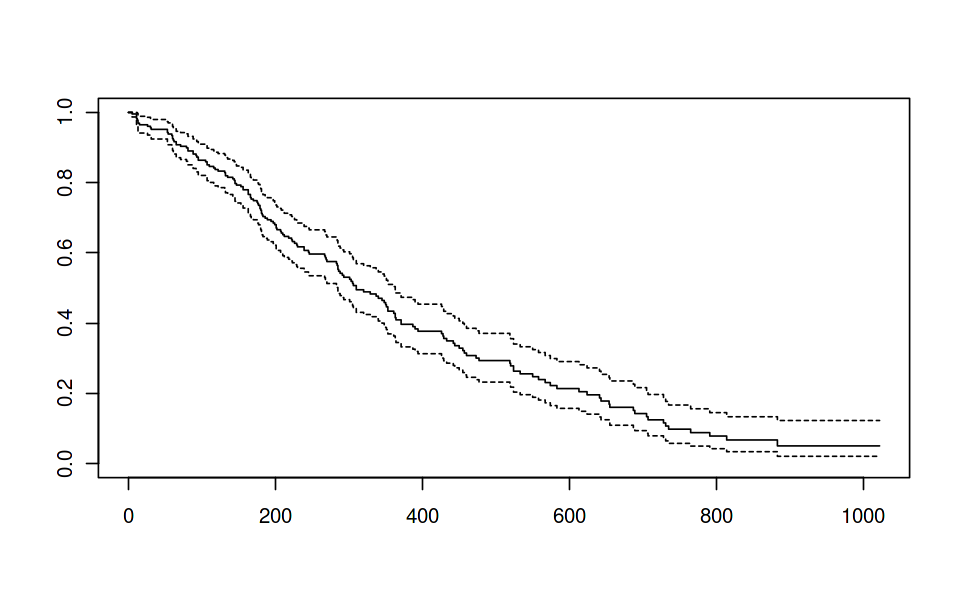

In [46]:
library(survival)
lung <- lung %>% 
  mutate(
    status = recode(status, `1` = 0, `2` = 1)
  ) # 0 = censored, 1 = dead 
lung %>% survfit(Surv(time, status) ~ 1, data = .) %>% 
  plot

### Hazard rate
Another question we can ask is: what is my "instantaneous" risk of dying right now, given that I've survived to time $t$? The quantity that answers this is the **hazard rate function**

$$h(t)=\lim_{\Delta t\to 0} \frac{\mathbb{P}(t \le T < t + \Delta t\mid T>t)}{\Delta t}$$

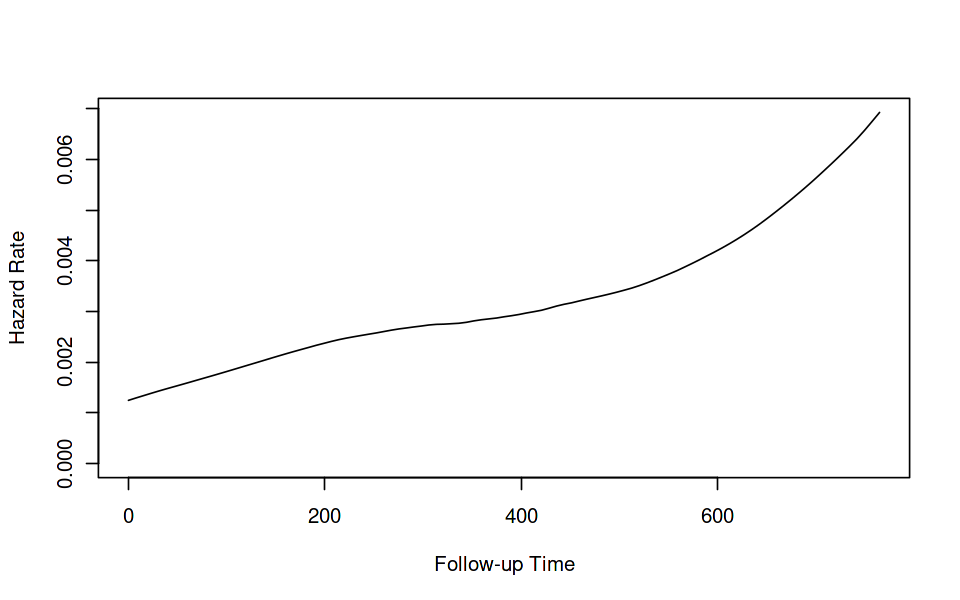

In [174]:
library(muhaz)
mod.lung <- muhaz(lung$time, lung$status) # 1 = failure, 0 = censored
plot(mod.lung)

### BHHT data

- The full BHHT dataset is uploaded to the course website.
- (A reduced version containing 10,000 randomly sampled rows is posted to the Github.)

In [34]:
url <- 'https://github.com/terhorst/stats504/raw/main/lectures/week12/bhht_small.csv.gz'
bhht <- read_csv(url)

Rows: 10000 Columns: 49
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (25): wikidata_code, approx_birth, approx_death, gender, level1_main_occ...
dbl (24): birth, death, updated_death_date, birth_min, birth_max, death_min,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
bhht %>% select(birth, death, birth_estimation, death_estimation)

birth,death,birth_estimation,death_estimation
<dbl>,<dbl>,<dbl>,<dbl>
1549,1614,1549,1614.0000
1878,1924,1878,1924.0000
1927,2019,1927,2019.0000
1949,NA,1949,2023.3899
1969,NA,1969,2044.3962
1829,1857,1829,1857.0000
1779,1845,1779,1845.0000
1959,NA,1959,2036.9830
1976,NA,1976,2053.0374


## Questions

This is an interesting data set and there are many questions we can ask (which you will do, on Report 7!) Here are a few that come to mind regarding lifespan in particular:

1. What's the average lifespan in this dataset?
2. What's the distribution of birth years (by century)?
3. How correlated are a) birth year and b) life span?
4. What covariates do we have? How might those affect lifespan?

In [36]:
bhht %>% mutate(lspan = death - birth) %>% 
    lm(lspan ~ birth * un_region, data = .) %>%
    summary


Call:
lm(formula = lspan ~ birth * un_region, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.616  -8.995   3.097  11.941  51.228 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             45.957257   9.806660   4.686 2.87e-06 ***
birth                    0.007634   0.005265   1.450   0.1471    
un_regionAmerica        15.338034  20.095347   0.763   0.4453    
un_regionAsia           -5.907572  11.057406  -0.534   0.5932    
un_regionEurope        -10.985980  10.340784  -1.062   0.2881    
un_regionOceania        77.789877  67.192402   1.158   0.2470    
birth:un_regionAmerica  -0.002555   0.010686  -0.239   0.8111    
birth:un_regionAsia      0.007483   0.005970   1.253   0.2101    
birth:un_regionEurope    0.011355   0.005560   2.042   0.0412 *  
birth:un_regionOceania  -0.035075   0.035489  -0.988   0.3230    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.62 on 4306 d

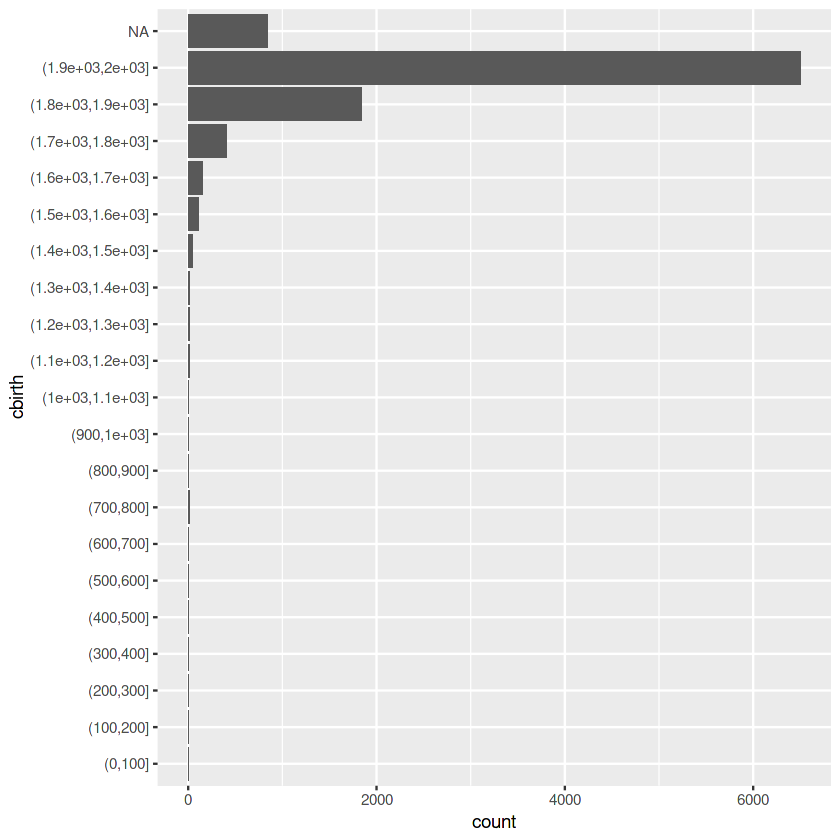

In [37]:
bhht %>% mutate(cbirth = cut(birth, seq(0, 2000, 100))) %>% 
    ggplot(aes(x = cbirth)) + geom_bar() + 
    coord_flip()

In [38]:
bhht %>% mutate(lspan = death - birth) %>% lm(lspan ~ birth, data = .) %>% summary  t

ERROR: Error in parse(text = x, srcfile = src): <text>:1:85: unexpected symbol
1: bhht %>% mutate(lspan = death - birth) %>% lm(lspan ~ birth, data = .) %>% summary  t
                                                                                        ^


### Survival data

There are two basic features of survival data:

- **Time to Event**: The primary variable of interest, representing the time until the occurrence of a specific event.
- **Event Indicator**: A binary variable indicating whether the event of interest (e.g., failure, death) has occurred (1) or not (0).

This data is typically collected over a study period, with observations on individuals starting from a defined starting point until the occurrence of the event or the end of the study period.


### Censoring

A defining feature of survival data that makes its analysis different from other types of data is that it is usually *censored*:
- The event of interest may not have observed for some subjects during the study period for various reasons.
- Example: what is the lifespan of everyone born in 1940?
    - We only know it definitively for those who have already passed away.
    - For everyone else, we only know that their lifespan is _at least_ 84 years.
- Simply treating the observed lifespans like they are a random sample from the "lifespan distribution" is wrong if there is censoring.

### Censoring
Three types of censoring:    
- **Right Censoring**: The most common form, where the event has not occurred by the end of the study or the individual is lost to follow-up. We know only that the event time is greater than a certain value.
- **Left Censoring**: The event occurred before the individual entered the study, so the exact time is unknown but less than a certain value.
- **Interval Censoring**: The exact time of the event is unknown but falls within a certain interval

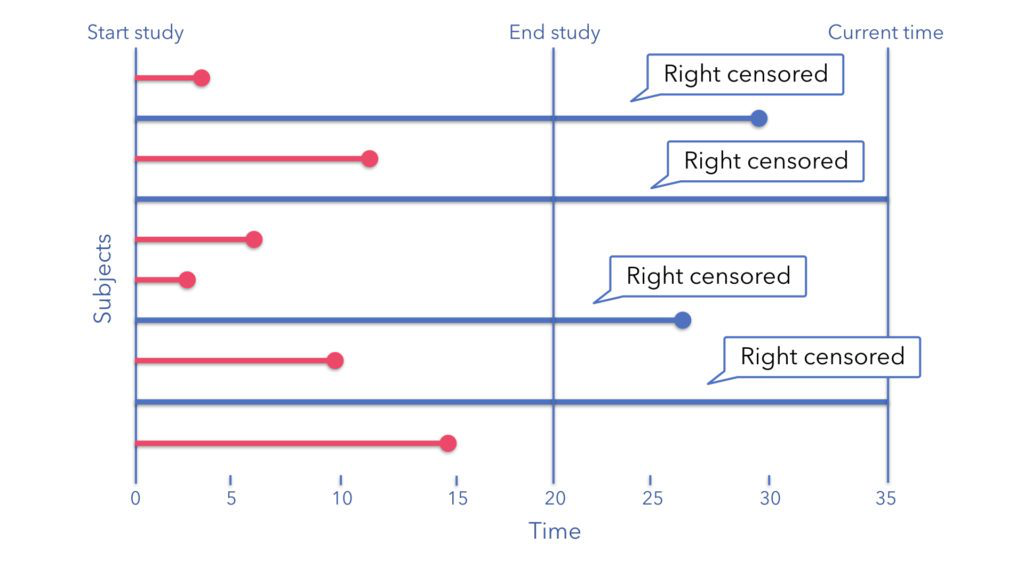

(Source: https://jigso.com/the-notion-of-censoring-in-survival-analysis/)

In [39]:
censor_plot <- function() {
    times = c(1.9,2.2,3.3,.5,1.5,3.5); marked = 1 + (rev(times) > 2.5); col = c("blue","red")[marked]
    barplot(times, width=.01, space=99, ylim=c(1,6), xlim=c(0,4), 
            horiz=TRUE, xlab="Years", ylab="Patient", xaxt = "n", yaxt="n")
    # points(c(1.9,2.2,3.3,.5,1.5,3.5), cex=0.75, pch=19)
    # Now call axis to draw tick marks and labels at 1:3
    axis(2, at = 1:6)
    axis(1, at = 0:4)
    abline(v=2.5)
    points(rev(times), c(6,5,4,3,2,1), 
           pch=c('o','x')[marked],
           col=col)
}

Censoring example:

- Everyone receives heart surgery at time 0 and is tracked for 2.5 years
- Blue 'o' denotes a heart attack observed while on study
- Red 'x' denotes a heart attack that occurs after study conclusion

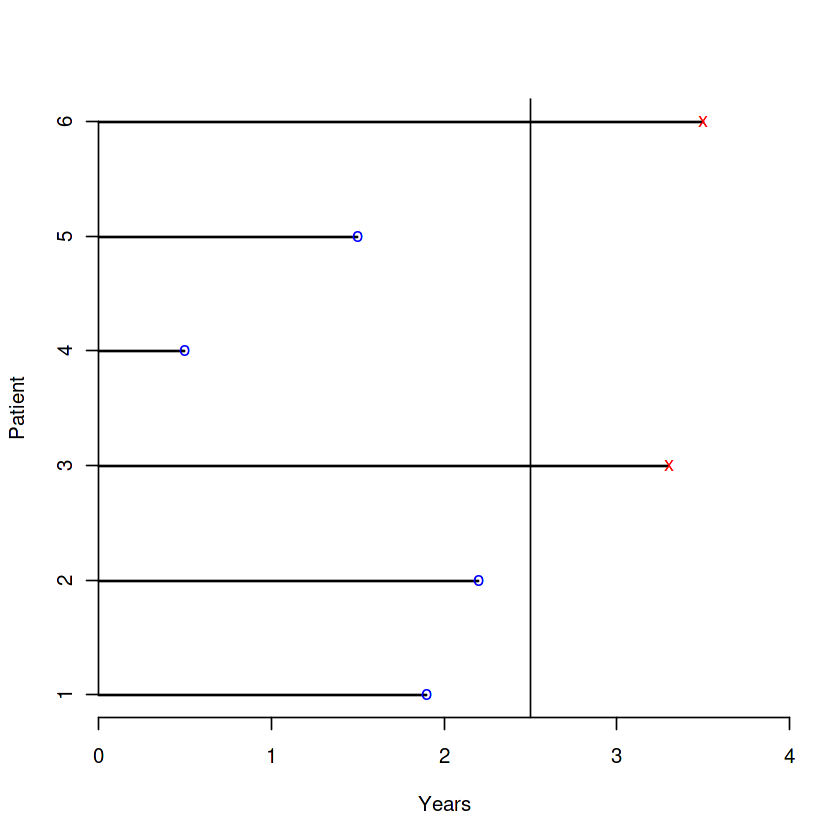

In [40]:
censor_plot()

# Terminology
- Random variable $T$ is the *survival time*
- CDF: $$F(t) = \mathbb{P}(T \le t)$$
- Survival function: $$S(t) = \mathbb{P}(T>t) = 1-F(t)$$
- PDF: $$f_T(t) = F'(t) = -S'(t)$$

### Hazard function
- The *hazard function* $h(t)$ is defined as $$h(t)=\lim_{\Delta t\to 0} \frac{\mathbb{P}(t \le T < t + \Delta t\mid T>t)}{\Delta t}$$
- Given that individual has survived to time $t$, the probability of death in the interval $[t, t + \Delta t)$ is  $\approx h(t)\Delta t$ (for small $\Delta t$)
- We are often interested in estimating this quantity.
- The cumulative hazard function $H(x)$ is defined as
$$H(x) = \int_0^x h(t)\,dt$$

### Relationships
- Note that $h(t)$ is a derivative: $$h(t) = \frac{f_T(t)}{S(t)} = -\frac{\mathrm{d}}{\mathrm{d}t}\log S(t)$$
- Hence, 
$$\begin{align*}S(t) &= \exp\left(-\int_0^t h(u)\,\mathrm{d}u\right) \\ 
 f(t) &= -S'(t) = h(t)\exp\left(-\int_0^t h(u)\,\mathrm{d}u\right) \\
H(x) &= -\int^x_0 \mathrm{d} \log S(u) = -\log S(x)
\end{align*}$$
- $\therefore$ distribution of $T$ is completely specified by $h$, $H$, $f$, or $S$

### Mean residual life
- This answers the question, *given that I have survived to time $x$, what is my expected future life span*
- Mathematically,

\begin{align*}
\operatorname{mrl}(x) &= \mathbb{E}(T-x\mid T>x) \\
&= \int_{x}^\infty (t-x)\,[f(t)/S(x)]\,dt \\
&= -\frac{\int_{x}^\infty (t-x) dS(t)}{S(x)} \\
&= \frac{\int_x^\infty S(t)\,dt}{S(x)}
\end{align*}

### Median survival time
This is simply the median of the survival distribution:

$$x_{1/2} = \inf \{t: S(t)\le 1/2\}$$

This generalizes to other quantiles by setting $0\le p \le 1$ in place of $1/2$ above.

### Example 
$h(t) = \lambda$ for some constant $\lambda>0$. What is the distribution of $T$? (i.e. what is $F(t)$)?

**Solution**. $F(t) = 1 - S(t) =1 -  e^{-\int_0^t \lambda \, \mathrm{d} u} = 1 - e^{-\lambda t}$, so $T \sim \operatorname{Exponential}(\lambda).$

### Exponential survival model
Exponential is the simplest survival model and has some nice properties:
- $\mathbb{P}(X>x+z\mid X>x)=\mathbb{P}(X>z)$  (memoryless)
  - Hence $\operatorname{mrl}(x)=1/\lambda$.
- Quantiles: $x_p=\log(1-p)/\lambda$.
  - Hence: $x_{1/2} = -\log(2)/\lambda$.
- $H(x) = -\log S(x) = \lambda x$. 
    - This can be used to check goodness of fit. 
    - Plot $\log \hat{S}(x)$ against $x$ and assess linearity.

### Example 2
The Weibull distribution with parameters $\alpha,\lambda > 0$ has pdf 

$$f_T(t) = \alpha\lambda(\lambda t)^{\alpha-1}\exp\left[-(t\lambda)^\alpha\right],\,t\ge 0.$$

**Challenge**: quickly guess the hazard function $h(t)$.

**Solution**. If $H(t) = \left(\lambda t\right)^{\alpha}$ then $$f_T(t) = H'(t) e^{-[H(t)-H(0)]} \mathrm{d}u.$$ Hence $$h(t) = H'(t)= \alpha\lambda(\lambda t)^{\alpha-1}.$$

- The Weibull distribution is common in survival analysis because it lets us control the shape of the hazard function while still being reasonably easy to work with. 
- Also, if $X\sim\operatorname{Weibull}(\alpha,\beta)$ then $$\log X = \mu + \sigma E$$ where $\mu=(\log \beta)/\alpha$, $\sigma=1/\alpha$ and $E\sim \operatorname{Gumbel}(0,1)$.
- Since $\log H(t) = \alpha (\log t - \log \beta)$, this can again be used to check for goodness of fit.

Weibull survival function:

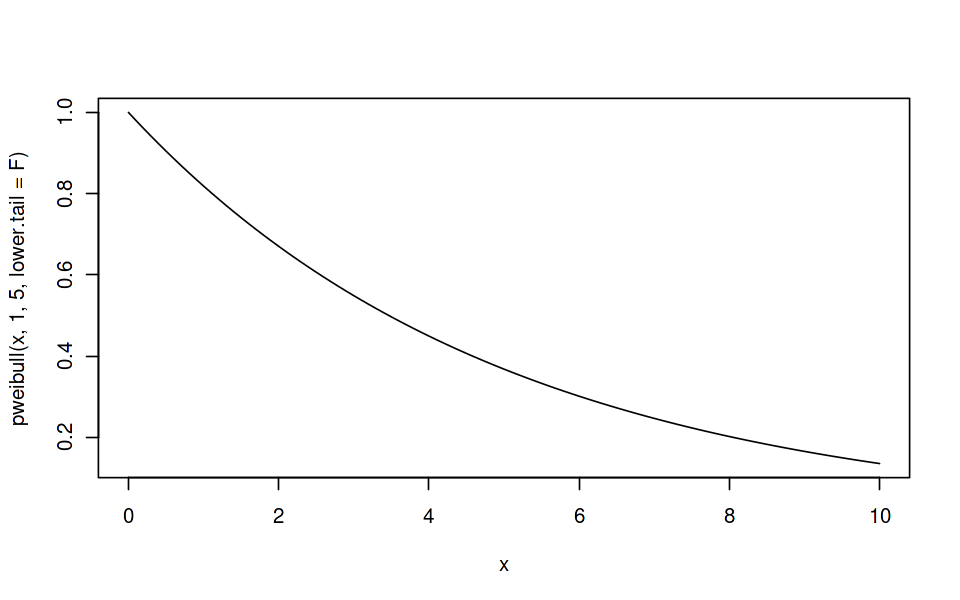

In [12]:

curve(pweibull(x, 1, 5, lower.tail = F), from=0, to=10)

Weibull hazard function:

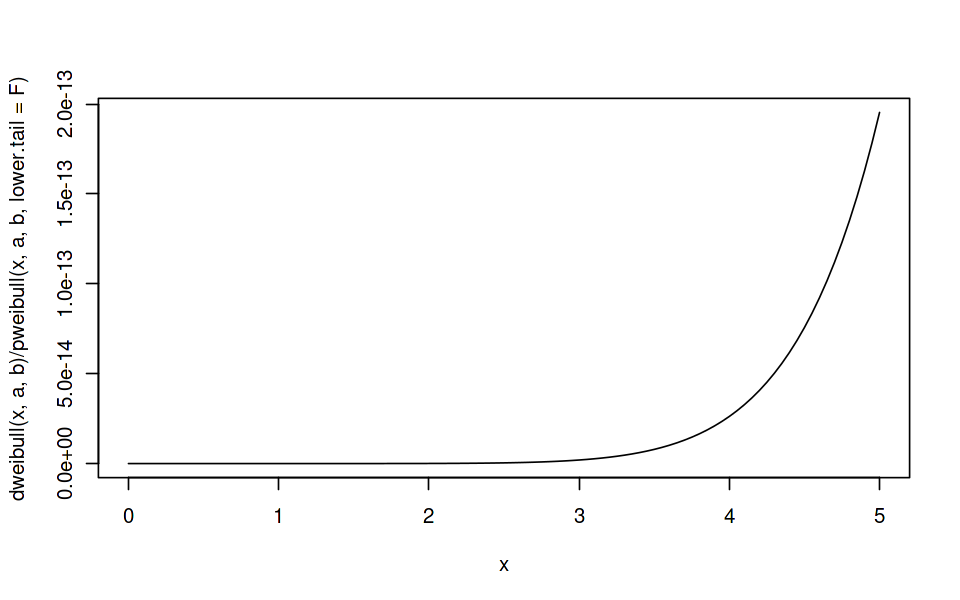

In [208]:
a=10;b=100; 
curve(dweibull(x, a, b) / pweibull(x, a, b, lower.tail = F), from=0, to=5)

## Shapes of the hazard function
- Models with increasing hazard rates are more common. Why?
- Can you name a situation where decreasing hazard rate may occur?
- Hump-shaped may occur if there is an initial "danger period", e.g. infancy.
- The hazard function tends to be the most interpretable, so most people prefer it as a way to model survival.

# Survival analysis
- "Survival analysis" = estimating $S(t)$
- With no censoring, $$\hat{S}_{\text{MLE}}(t) = \{\text{proportion of sample who lived longer than $t$}\}$$

## The Kaplan-Meier estimator
The Kaplan-Meier (1958; >50k cites) *product-limit estimator* is $$\hat{S}(t) = \prod_{i:t_i \le t} \left( 1 - \frac{d_j}{n_j} \right)$$

- $t_1, \dots, t_k$: $k$ (distinct event times). 
- $d_i$: # of individuals who die at time $t_i$. 
- $n_i$: # of individuals who at *at risk* (alive and have not been censored) *prior* to time $t_i$



## Intuition
- If $t_{j} \le t < t_{j+1}$ then $$\begin{align*}\mathbb{P}(T>t) &= \mathbb{P}(T>t_j) \\ 
&= \mathbb{P}(T>t_{j} \mid T > T_{j-1}) \mathbb{P}(T > t_{j-1}) \\
&\vdots \\
&= \prod_{i=1}^j \mathbb{P}(T > t_i \mid T > t_{i-1})
\end{align*}$$
- MLE of $\mathbb{P}(T > t_j \mid T > t_{j-1})$ is the proportion of at-risk individuals who survive: $1 - d_j/n_j$

In R the `survival` library can fit a survival curve.

## Example
Let's go back to our BHHT dataset and look at people who were born in the last 100 years:

In [33]:
bhht %>% filter(birth >= 2024 - 100) %>% head

ERROR: Error in filter(., birth >= 2024 - 100): object 'bhht' not found


First, we will assume that everyone who has a missing `death` value is still alive.

In [219]:
bhht %>% filter(birth == 1982) %>% 
    select(birth, death, birth_estimation, death_estimation)

birth,death,birth_estimation,death_estimation
<dbl>,<dbl>,<dbl>,<dbl>
1982,NA,1982,2059.621
1982,NA,1982,2054.356
1982,NA,1982,2064.579
1982,NA,1982,2061.987
1982,NA,1982,2057.001
1982,NA,1982,2066.376
1982,NA,1982,2065.067
1982,NA,1982,2059.657
1982,NA,1982,2059.621


In [42]:
bhht_surv <- bhht %>% filter(birth >= 2024 - 100) %>% 
    select(birth, death_estimation, un_region) %>% 
    mutate(
        dead = death_estimation <= 2024,
        time = ifelse(dead, death_estimation - birth, 2024 - birth)
    )

bhht_surv %>% filter(birth == 1982)

birth,death_estimation,un_region,dead,time
<dbl>,<dbl>,<chr>,<lgl>,<dbl>
1982,2059.621,Europe,FALSE,42
1982,2054.356,Oceania,FALSE,42
1982,2064.579,America,FALSE,42
1982,2061.987,Asia,FALSE,42
1982,2057.001,Asia,FALSE,42
1982,2066.376,Europe,FALSE,42
1982,2065.067,Europe,FALSE,42
1982,2059.657,Asia,FALSE,42
1982,2059.621,Europe,FALSE,42


In [232]:
library(survival)

sfit = survfit(Surv(time, dead) ~ un_region, data = bhht_surv)
summary(sfit)

Call: survfit(formula = Surv(time, dead) ~ un_region, data = bhht_surv)

66 observations deleted due to missingness 
                un_region=Africa 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
 22.0    197       1   0.9949 0.00506      0.98505        1.000
 26.0    196       2   0.9848 0.00872      0.96782        1.000
 32.0    176       1   0.9792 0.01031      0.95917        1.000
 34.0    166       2   0.9674 0.01314      0.94197        0.993
 37.0    147       1   0.9608 0.01460      0.93260        0.990
 40.0    127       1   0.9532 0.01633      0.92176        0.986
 41.0    123       1   0.9455 0.01794      0.91096        0.981
 43.0    114       1   0.9372 0.01961      0.89953        0.976
 46.0    105       1   0.9283 0.02136      0.88733        0.971
 47.0    100       1   0.9190 0.02307      0.87485        0.965
 51.0     90       1   0.9088 0.02497      0.86112        0.959
 55.0     82       1   0.8977 0.02702      0.84627        0.952
 56.0     80     

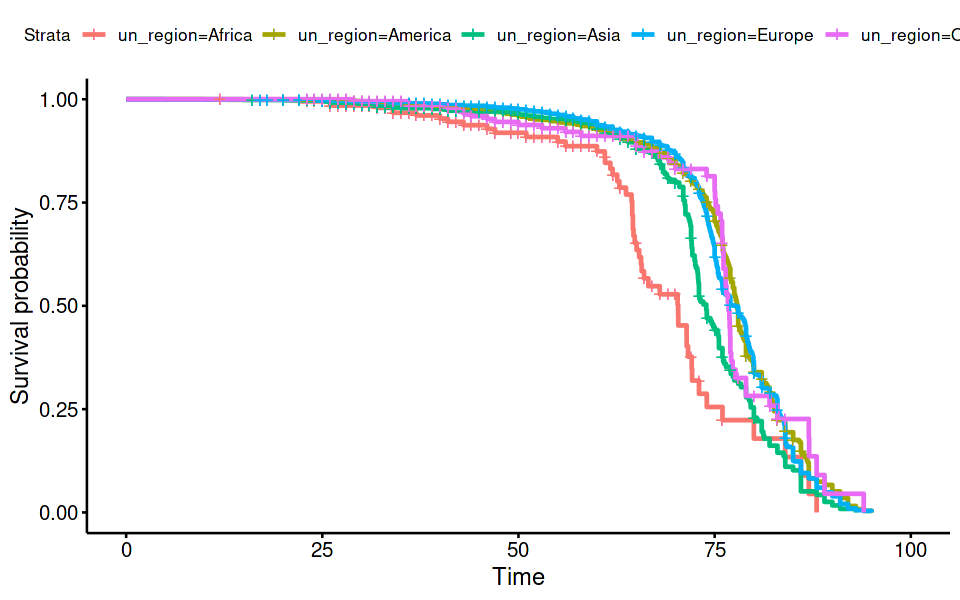

In [233]:
ggsurvplot(sfit)

## How it works: The Kaplan-Meier estimator


We will focus on right-censored data to begin.

- $t_1, \dots, t_k$: $k$ (distinct event times). 
- $d_i$: # of individuals who die at time $t_i$. 
- $n_i$: # of individuals who at *at risk* (alive and have not been censored) *prior* to time $t_i$

*Important*: we assume that the censoring times and lifetimes are independent.



The Kaplan-Meier (1958; >50k cites) *product-limit estimator* is $$\hat{S}(t) = \prod_{j:t_j \le t} \left( 1 - \frac{d_j}{n_j} \right)$$

### Intuition
- If $t_{j} \le t < t_{j+1}$ then $$\begin{align*}\mathbb{P}(T>t) &= \mathbb{P}(T>t_j) \\ 
&= \mathbb{P}(T>t_{j} \mid T > T_{j-1}) \mathbb{P}(T > t_{j-1}) \\
&\vdots \\
&= \prod_{i=1}^j \mathbb{P}(T > t_i \mid T > t_{i-1})
\end{align*}$$
- MLE of $\mathbb{P}(T > t_j \mid T > t_{j-1})$ is the proportion of at-risk individuals who survive: $1 - d_j/n_j$

### Using covariates

- If we specify covariates, `survfit` will generate one survival curve per unique combination of the covariates.


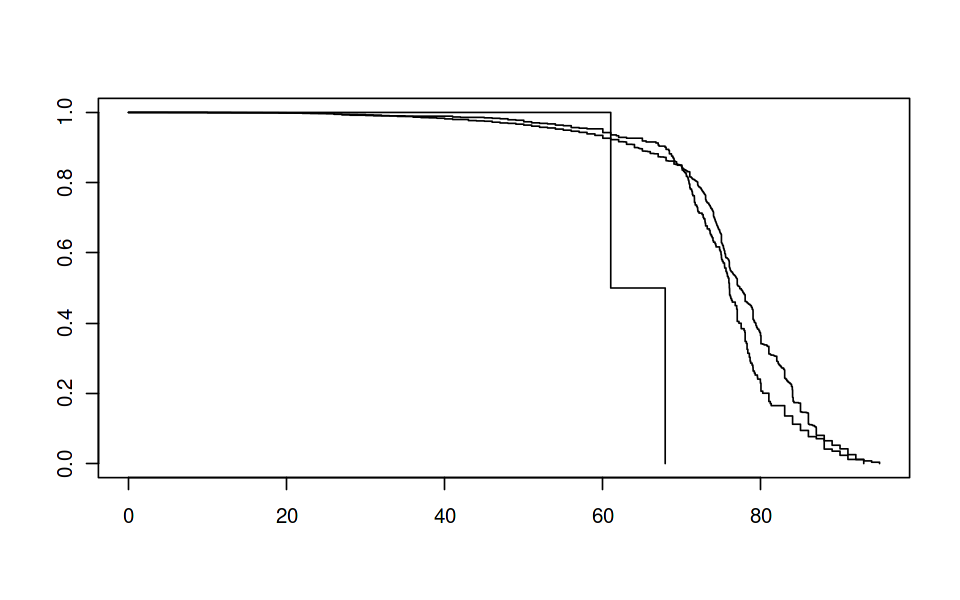

In [161]:
bhht_surv <- bhht %>% filter(birth >= 2024 - 100) %>% 
    select(birth, death_estimation, gender, un_region) %>% 
    mutate(
        dead = death_estimation < 2024,
        time = ifelse(dead, death_estimation - birth, 2024 - birth)
    ) %>% 
    drop_na


sfit = survfit(Surv(time, dead) ~ gender, data = bhht_surv)
plot(sfit)

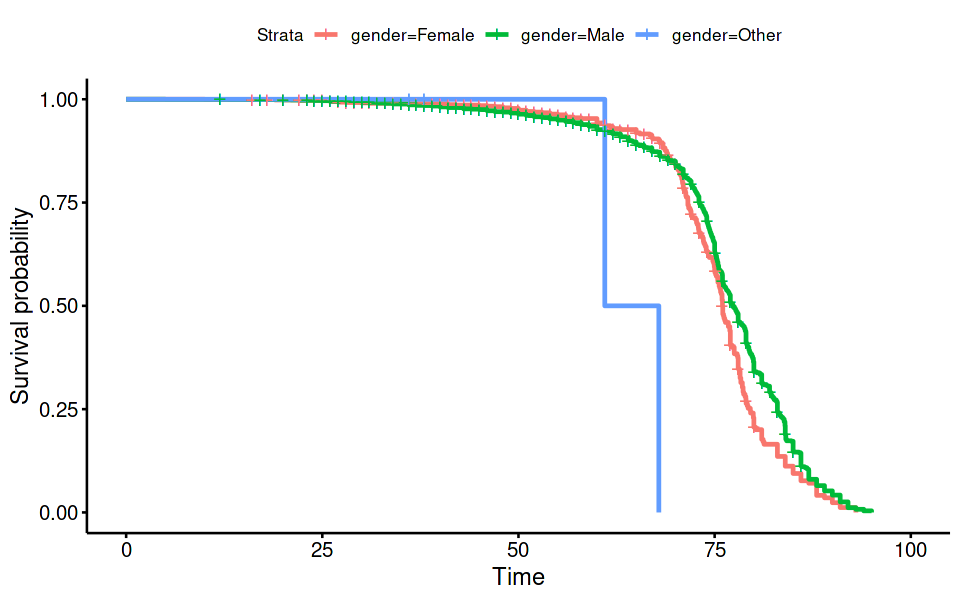

In [162]:
library(survminer)
ggsurvplot(sfit)

# STATS 504
## Survival analysis II: More on K-M, Cox Models, case studies

In [110]:
library(tidyverse)
library(survival)
library(survminer)
library(gtsummary)

### Survival of baseball players

- "The Longevity of Baseball Hall of Famers Compared to Other Players", Abel and Kruger (2005).
- Using a Cox proportional hazards model, found that median survival after being inducted into the Hall of Fame was 5 years shorter than for noninducted players (18 vs. 23 years, respectively).


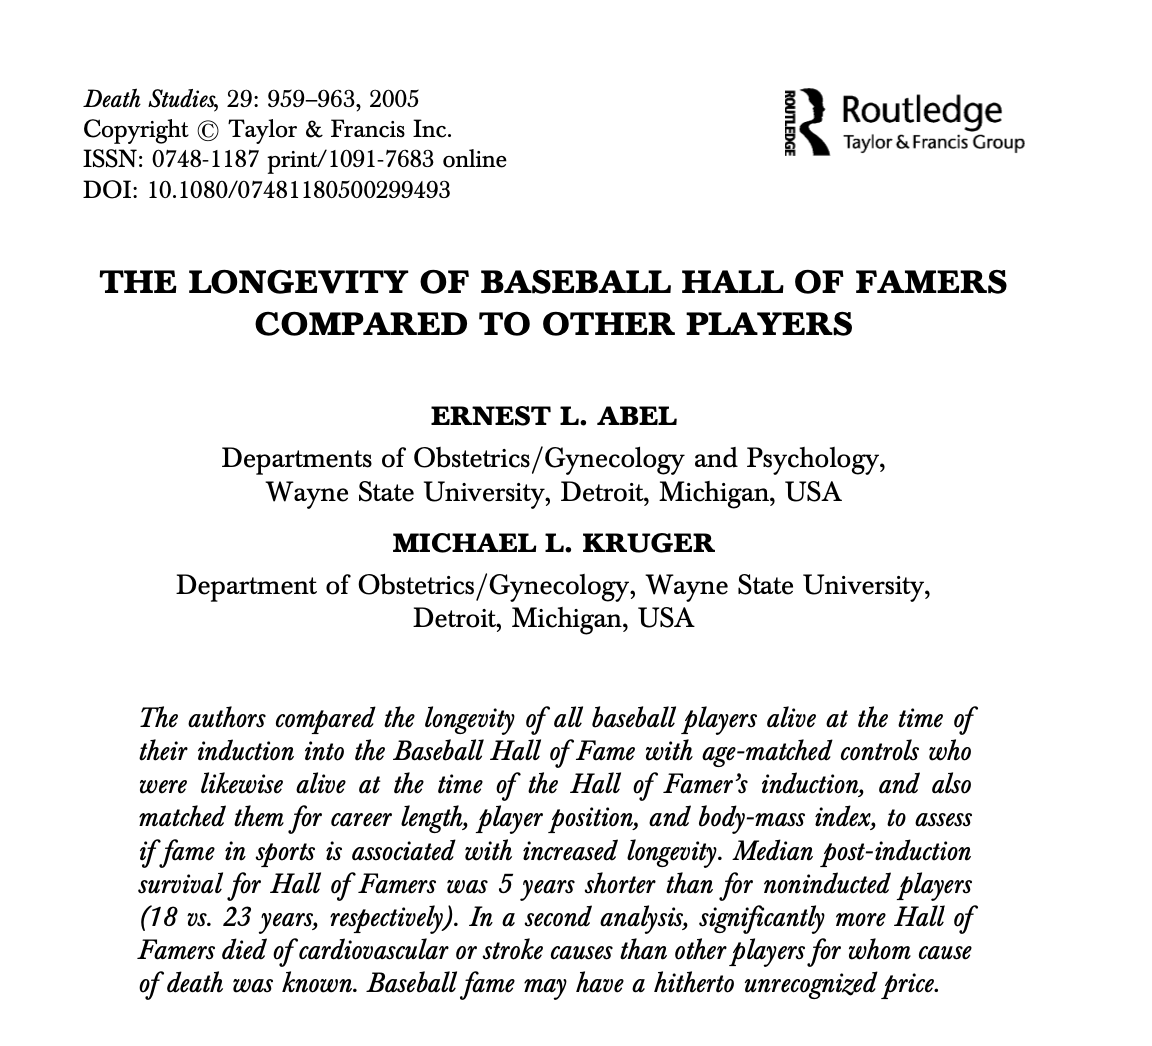

> "Cox  Proportional-hazards  Survival analysis was used to determine whether differences in survival between the groups were significant, controlling for career length,player position, and body mass index (BMI)."

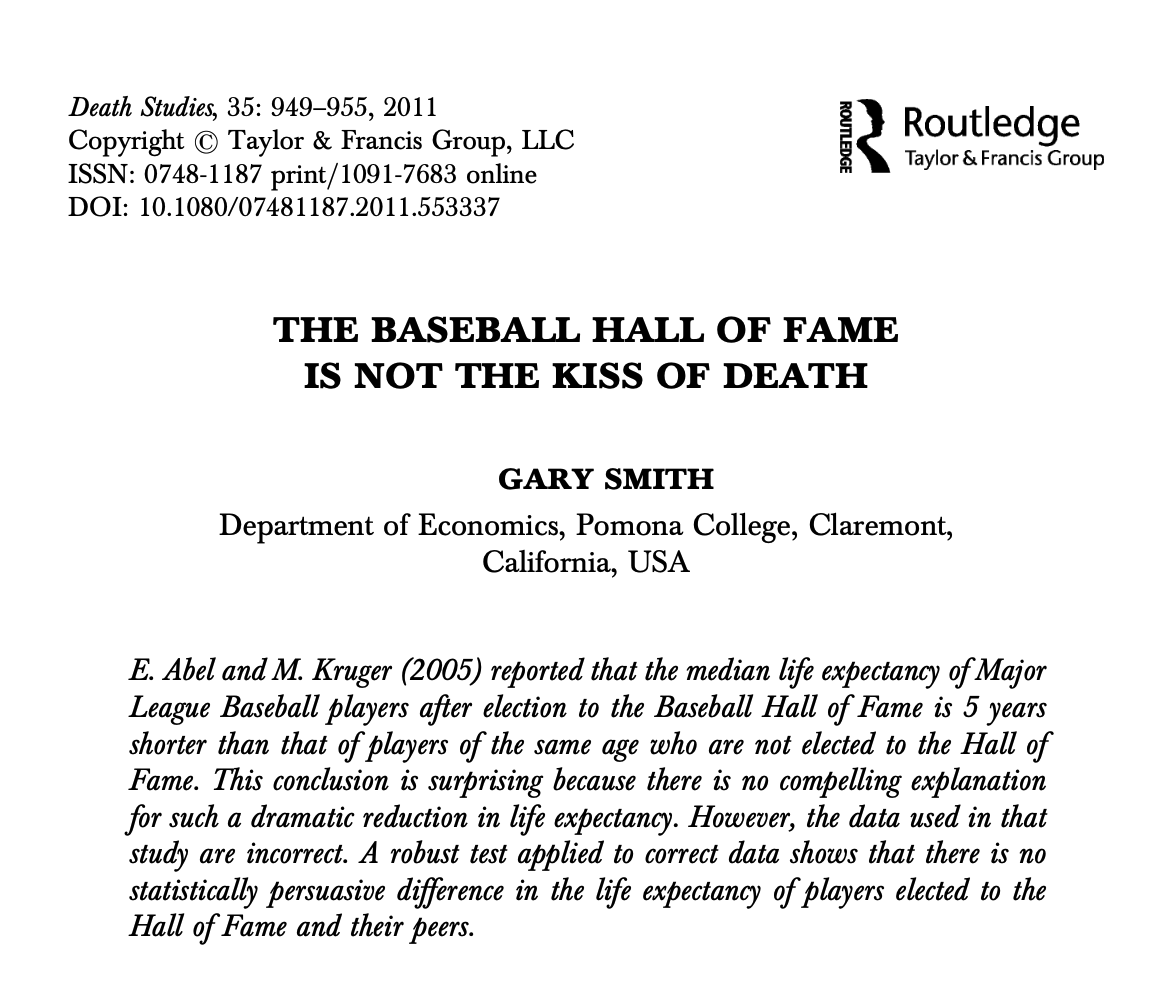

In [76]:
library(Lahman)
HallOfFame %>% head

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>
1,cobbty01,1936,BBWAA,226,170,222,Y,Player,NA
2,ruthba01,1936,BBWAA,226,170,215,Y,Player,NA
3,wagneho01,1936,BBWAA,226,170,215,Y,Player,NA
4,mathech01,1936,BBWAA,226,170,205,Y,Player,NA
5,johnswa01,1936,BBWAA,226,170,189,Y,Player,NA
6,lajoina01,1936,BBWAA,226,170,146,N,Player,NA


In [82]:
xtabs(~  category + inducted, data = HallOfFame)

                   inducted
category               N    Y
  Manager             51   23
  Pioneer/Executive    7   37
  Player            3925  270
  Umpire               0   10

In [85]:
People %>% colnames

[1] "playerID"     "birthYear"    "birthMonth"   "birthDay"     "birthCountry"
 [6] "birthState"   "birthCity"    "deathYear"    "deathMonth"   "deathDay"    
[11] "deathCountry" "deathState"   "deathCity"    "nameFirst"    "nameLast"    
[16] "nameGiven"    "weight"       "height"       "bats"         "throws"      
[21] "debut"        "finalGame"    "retroID"      "bbrefID"      "deathDate"   
[26] "birthDate"

In [104]:
HallOfFame %>% left_join(People) %>% 
    filter(deathYear > yearID | is.na(deathYear)) %>% 
    mutate(
        event = !is.na(deathYear),
        life_after_vote = ifelse(event, deathYear - yearID, 2024 - yearID)
    ) %>% 
    select(birthYear, yearID, deathYear, life_after_vote, event, category, inducted) ->
    bb_surv

Joining with `by = join_by(playerID)`


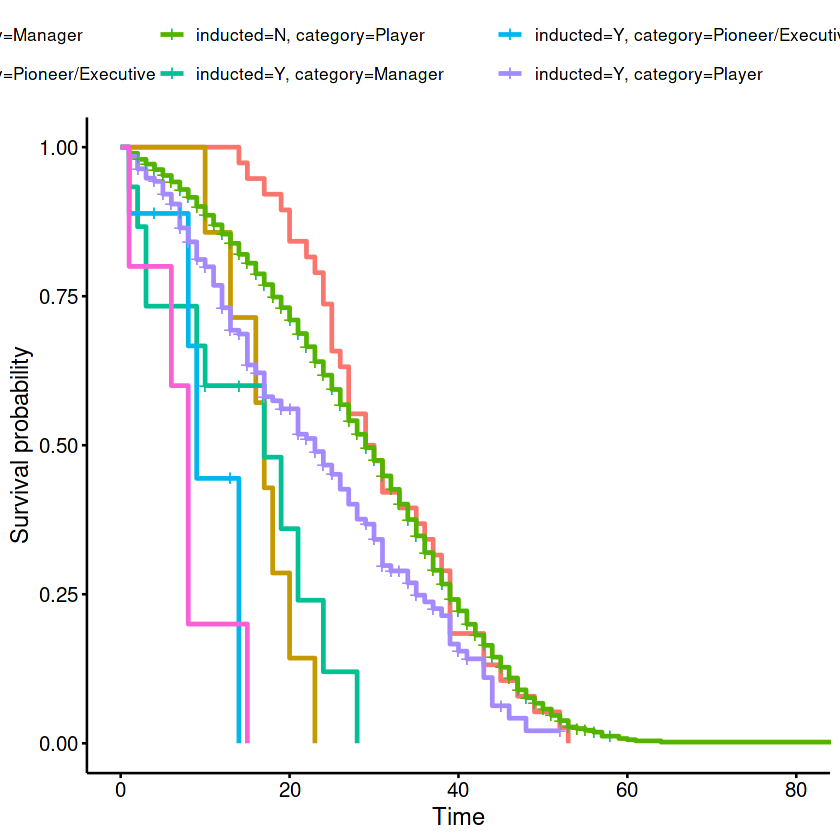

In [107]:
survfit(Surv(life_after_vote, event) ~ inducted + category, data = bb_surv) %>% ggsurvplot

## A complete survival analysis 
- Let's walk through a complete survival analysis using K-M.

These note follow Ch. 2 of ["Survival Analysis in R"](https://bookdown.org/mpfoley1973/survival/).

In [10]:
d_lung <- survival::lung %>%
  filter(!is.na(ph.ecog)) %>%
  mutate(
    ph.ecog = factor(
      ph.ecog,
      levels = c(0, 1, 2, 3, 4),
      labels = c("Asymptomatic", "Ambulatory", "In bed <50%", "In bed >50%", "Bedridden")),
    ph.ecog = fct_drop(ph.ecog),
    ph.ecog = fct_lump_n(ph.ecog, n = 2, other_level = "Bedridden"),
    sex = factor(sex, levels = c(1, 2), labels = c("Male", "Female")),
    age_bin = cut(age, breaks = c(38, 55, 65, 83)),
    patient_id = row_number()
  )

In [11]:


(m_fit <- survfit(Surv(time, status) ~ ph.ecog, data = d_lung))

Call: survfit(formula = Surv(time, status) ~ ph.ecog, data = d_lung)

                       n events median 0.95LCL 0.95UCL
ph.ecog=Asymptomatic  63     37    394     348     574
ph.ecog=Ambulatory   113     82    306     268     429
ph.ecog=Bedridden     51     45    183     153     288

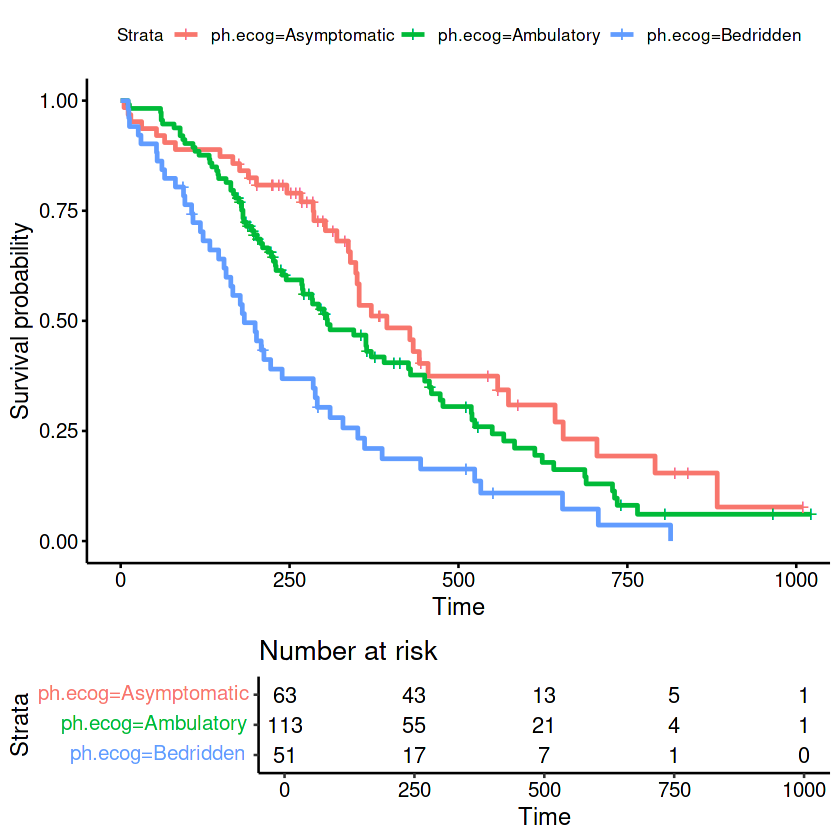

In [12]:
ggsurvplot(m_fit, risk.table = TRUE)

Call: survfit(formula = Surv(time, status) ~ sex, data = d_lung)

             n events median 0.95LCL 0.95UCL
sex=Male   137    111    270     218     320
sex=Female  90     53    426     348     550

Warning message in .add_surv_median(p, fit, type = surv.median.line, fun = fun, :
“Adding survival median lines is not allowed when fun is: cumhaz”


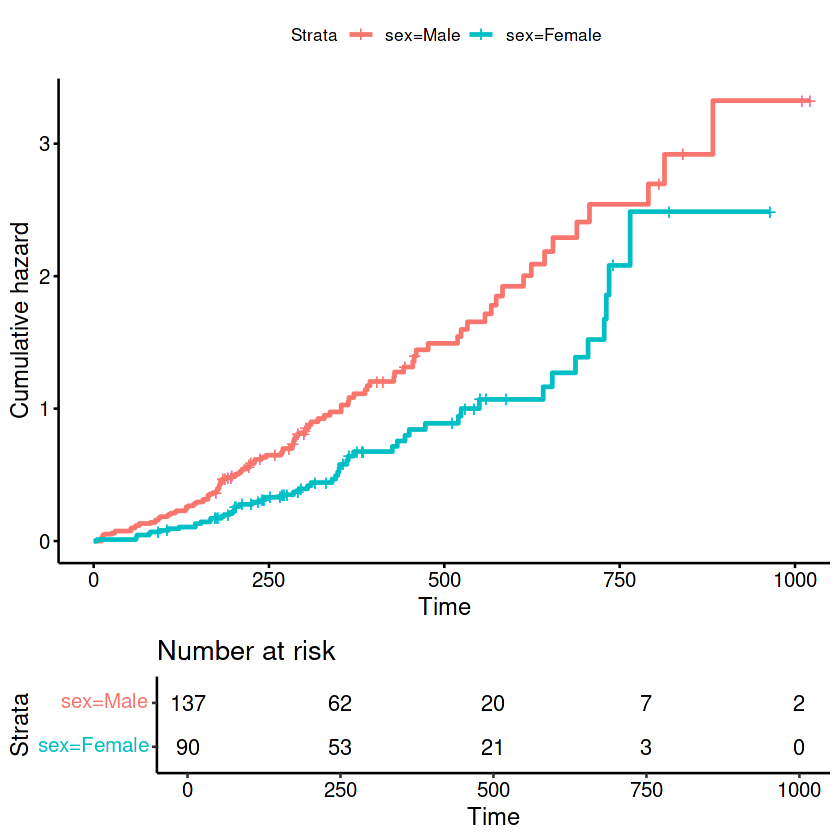

In [22]:
(km_fit <- survfit(Surv(time, status) ~ sex, data = d_lung))
ggsurvplot(km_fit, risk.table = TRUE, surv.median.line = "hv", fun = "cumhaz")

## Testing for differences in survival

- How can we test whether there is a significant difference in survival between different groups?
- Idea: $$H_0: h_0(t) = h_1(t)$$ versus $$H_0: h_0(t) = \lambda h_1(t)$$ for some $\lambda\neq 1$.
- Under $H_0$, appropriate test statistic has approximately Normal(0,1) distribution.

In [20]:
(km_diff <- survdiff(Surv(time, status) ~ sex, data = d_lung))

Call:
survdiff(formula = Surv(time, status) ~ sex, data = d_lung)

             N Observed Expected (O-E)^2/E (O-E)^2/V
sex=Male   137      111       91      4.42        10
sex=Female  90       53       73      5.50        10

 Chisq= 10  on 1 degrees of freedom, p= 0.002 

In [19]:
(km_diff <- survdiff(Surv(time, status) ~ ph.ecog, data = d_lung))

Call:
survdiff(formula = Surv(time, status) ~ ph.ecog, data = d_lung)

                       N Observed Expected (O-E)^2/E (O-E)^2/V
ph.ecog=Asymptomatic  63       37     54.2    5.4331    8.2119
ph.ecog=Ambulatory   113       82     83.5    0.0279    0.0573
ph.ecog=Bedridden     51       45     26.3   13.2582   15.9641

 Chisq= 19  on 2 degrees of freedom, p= 8e-05 

How about comparing the median time to survival?

In [29]:
surv_median(km_fit)

Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
ℹ Please use `select()` instead.
ℹ The deprecated feature was likely used in the survminer package.
  Please report the issue at <https://github.com/kassambara/survminer/issues>.”


strata,median,lower,upper
<chr>,<dbl>,<dbl>,<dbl>
sex=Male,270,218,320
sex=Female,426,348,550


## Proportional hazards regression
- The K-M estimator is _non-parametric_; it estimates a whole function without assuming any model.
- If we want to be able to interpret the effect of different covariates on survival, we need a model which relates
the covariates to the outcome (lifespan).
    - We are going to model the hazard rate function directly. 
    - The approach we will use is similar to how we used generalized linear modeling to allow differences in the mean parameter for various distributions.

### The Cox model
- Let $\mathbf{Z}$ be a vector of individual-specific covariates.
- The proportional hazards model assumes that $$h(t\mid \mathbf{Z}) = h_0(t)c(\beta^\intercal \mathbf{Z}),$$ where $h_0$ is an unknown baseline hazard rate and $\mathbf{Z}\in\mathbb{R}^p$ is a vector of predictors.
- $c(\cdot)$ is analagous to the link function in GLM. 
- The natural choice is $c=\exp$, leading to the famous Cox model.

### Interpretation
- Let $S_0(t)=\exp(-\int_0^t h_0(s)\,ds)$ be the baseline survival function.
- Then $$S(t\mid \mathbf{Z}) = \exp\left(-\int_0^t h(s\mid \mathbf{Z})\,ds\right) = S_0(t)^{e^{\mathbf{Z}^\intercal \beta}}$$
- Additionally, $\log h(t\mid\mathbf{Z}) = \log h_0(t) + \mathbf{Z}^\intercal \beta$, so $\log h_0(t)$ is a sort of intercept term.
- The Cox model is essentially a multiple linear regression of the log hazard on covariates. 
- This is known as a **semi-parametric** model: there is a parametric (finite dimensional) component $\beta$ as well as an infinite dimensional parameter $h_0(t)$.

### Proportional hazards property
As already remarked, the Cox model has the proportional hazards property:
   - Let $\mathbf{Z},\mathbf{Z}^*$ be covariates for two different patients.
   - Then $$\frac{h(t\mid\mathbf{Z})}{h(t\mid\mathbf{Z}^*)} = \exp[\beta(\mathbf{Z}-\mathbf{Z}^*)],$$ i.e. it is constant over time.
   - In particular, if there is a single treatment effect $\beta$, the hazard ratio is $e^\beta$, similar to logistic regression.

## Estimating the proportional hazards model
- Estimation is complicated by the fact that part of the model $h_0(t)$ is infinite dimensional.
- Cox's brilliant insight was that it is possible to estimate $\beta$ in spite of this!
- To overcome this we use a technique called *partial likelihoods*.
    - Say we observe deaths at times $t_1,\dots,t_D$.
    - The person who died at time $t_i$ is denoted "person $i$" and has covariates $\mathbf{Z}_i$.  (As usual, we assume no ties.)
    - Assuming no ties and independence between the life spans, we have
$$\mathbb{P}(\text{data}) = \prod_{i=1}^D \underbrace{\mathbb{P}(\text{person $i$ died}\mid\text{somebody died at $t_i$})}_\text{(I)} \underbrace{\mathbb{P}(\text{somebody died at $t_i$})}_\text{(II)}$$
    - Term (I) is simply the softmax function which we studied in multinomial logit: $$\frac{\exp(\mathbf{Z}_i^\intercal \beta)}{\sum_{j\in R(t_i)} \exp(\mathbf{Z}_j^\intercal \beta)}.$$ Here, the summation is over the set $R(t_i)$ of people who are at risk at time $t_i$.


## The partial likelihood
- The partial likelihood is formed by considering the product of term (I) only. That is, we condition on the observed death times $t_1,\dots,t_D$ and do not use them for inference: $$L(\beta) = \prod_i \frac{\exp(\mathbf{Z}_i^\intercal \beta)}{\sum_{j\in R(t_i)} \exp(\mathbf{Z}_j^\intercal \beta)}.$$

## The MPLE
- To fit the partial likelihood we maximize $\text{LL}(\beta)=\log L(\beta)$ with respect to $\beta$, obtaining the *maximum partial likelihood estimator* (MPLE).
- This can be accomplished by setting the score functions $$U_h = \frac{\partial \log L(\beta)}{\beta_h}=\sum_{i=1}^D Z_{ih} - \frac{\sum_{j\in R(t_i)} Z_{jh} \exp(\mathbf{Z}_j^\intercal \beta)}{\sum_{j\in R(t_i)} \exp(\mathbf{Z}_j^\intercal \beta)}$$ to zero.

## Fitting the proportional hazards model
The command ``coxph`` is used to fit the Cox model in R.

In [55]:
cfit = coxph(Surv(time, status) ~ sex, data = d_lung)
summary(cfit)

Call:
coxph(formula = Surv(time, status) ~ sex, data = d_lung)

  n= 227, number of events= 164 

             coef exp(coef) se(coef)      z Pr(>|z|)   
sexFemale -0.5237    0.5923   0.1674 -3.128  0.00176 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
sexFemale    0.5923      1.688    0.4266    0.8224

Concordance= 0.577  (se = 0.021 )
Likelihood ratio test= 10.3  on 1 df,   p=0.001
Wald test            = 9.78  on 1 df,   p=0.002
Score (logrank) test = 10.01  on 1 df,   p=0.002


### Interpreting the Cox model

Similar to logistic regression:

- A negative coefficient estimator means the hazard decreases with increasing values of the variable.
- Females have a log hazard of death equal to coef(cox_fit)[1] = -0.53 of that of males.
- I.e., at any given time, exp(coef(cox_fit)[1]) = 0.58 (42%) times as many females die as males.

### Assumptions of the Cox model

- Hazards are actually proportional!
- Covariates and coefficients do not depend on time.
- Log hazard is a linear function of the covariates.

       chisq df   p
sex      2.7  1 0.1
GLOBAL   2.7  1 0.1

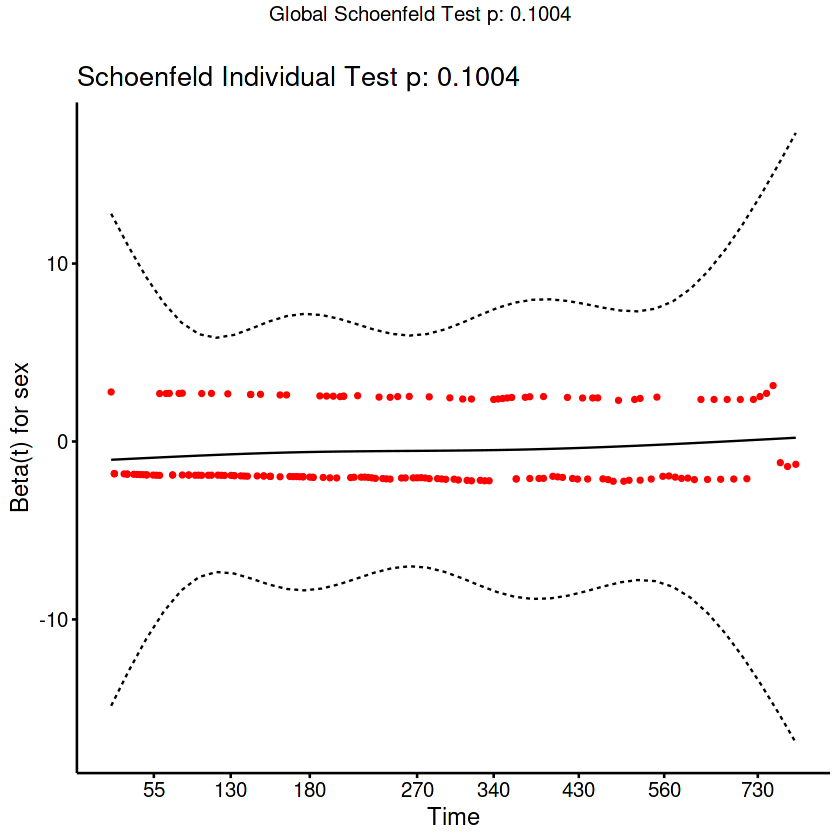

In [59]:
(cox_test_ph <- cox.zph(cfit))
ggcoxzph(cox_test_ph)

### Survival of baseball players

- "The Longevity of Baseball Hall of Famers Compared to Other Players", Abel and Kruger (2005).
- Using a Cox proportional hazards model, found that median survival after being inducted into the Hall of Fame was 5 years shorter than for noninducted players (18 vs. 23 years, respectively).


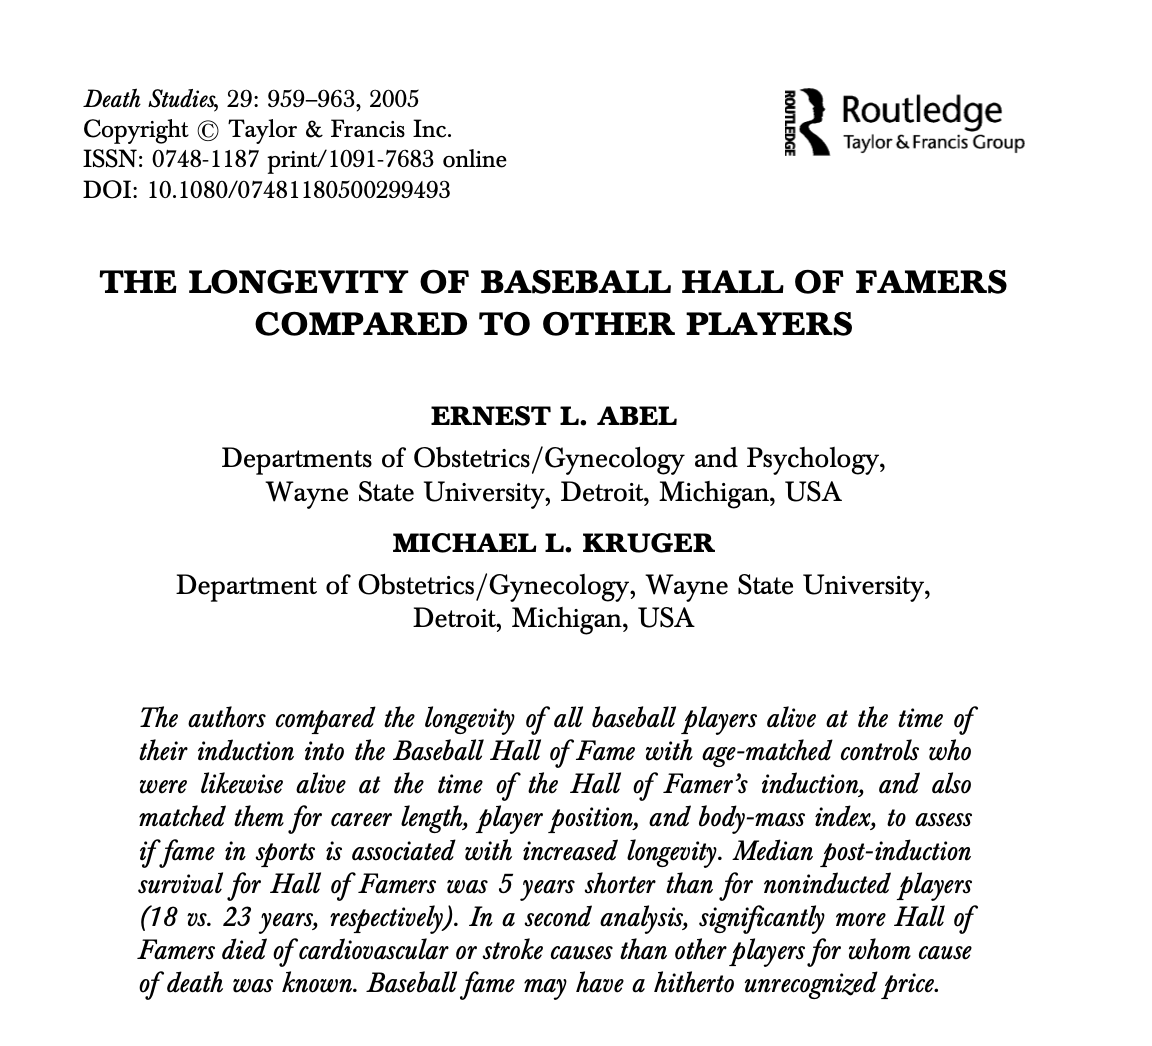

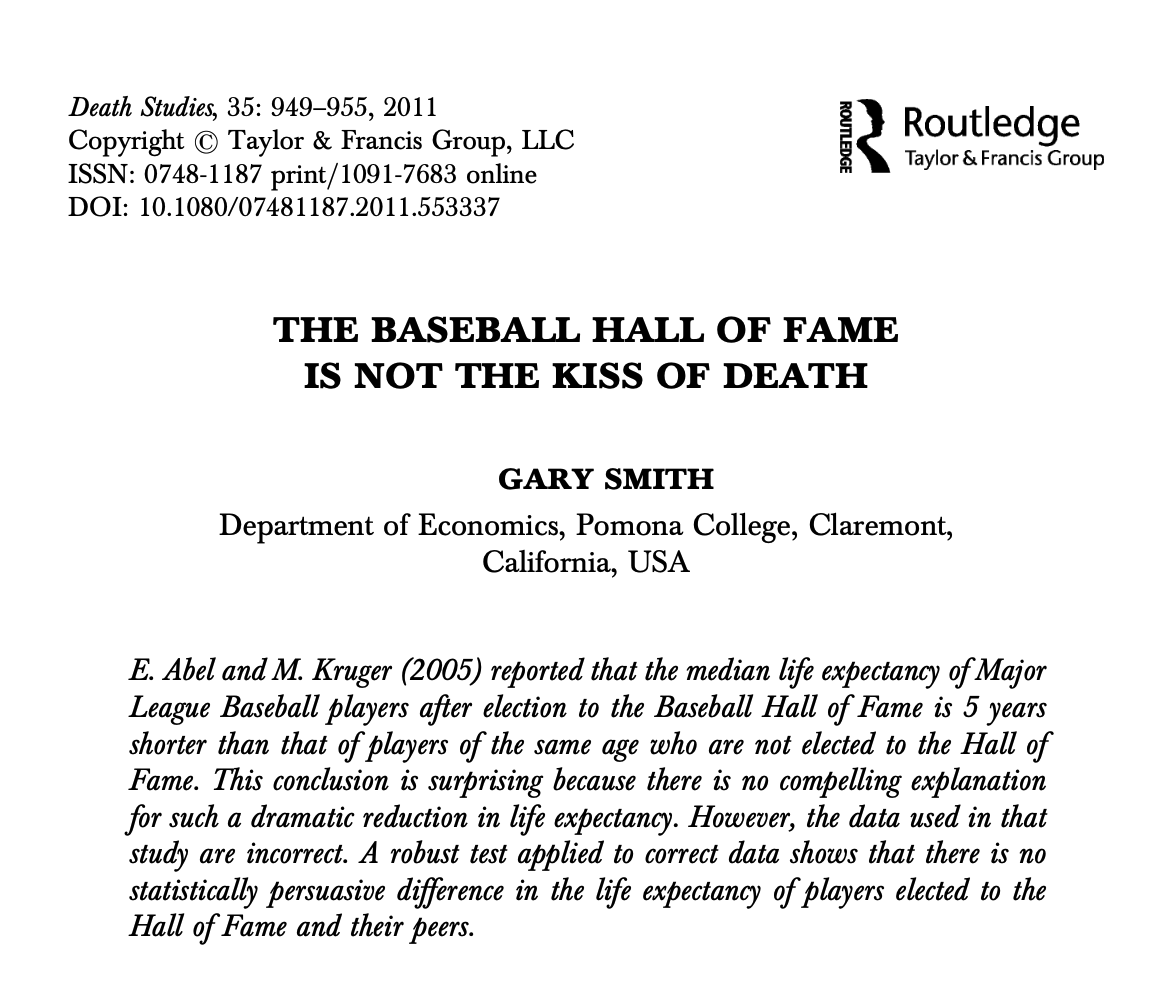

In [76]:
library(Lahman)
HallOfFame %>% head

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>
1,cobbty01,1936,BBWAA,226,170,222,Y,Player,NA
2,ruthba01,1936,BBWAA,226,170,215,Y,Player,NA
3,wagneho01,1936,BBWAA,226,170,215,Y,Player,NA
4,mathech01,1936,BBWAA,226,170,205,Y,Player,NA
5,johnswa01,1936,BBWAA,226,170,189,Y,Player,NA
6,lajoina01,1936,BBWAA,226,170,146,N,Player,NA


In [82]:
xtabs(~  category + inducted, data = HallOfFame)

                   inducted
category               N    Y
  Manager             51   23
  Pioneer/Executive    7   37
  Player            3925  270
  Umpire               0   10

In [85]:
People %>% colnames

[1] "playerID"     "birthYear"    "birthMonth"   "birthDay"     "birthCountry"
 [6] "birthState"   "birthCity"    "deathYear"    "deathMonth"   "deathDay"    
[11] "deathCountry" "deathState"   "deathCity"    "nameFirst"    "nameLast"    
[16] "nameGiven"    "weight"       "height"       "bats"         "throws"      
[21] "debut"        "finalGame"    "retroID"      "bbrefID"      "deathDate"   
[26] "birthDate"

In [104]:
HallOfFame %>% left_join(People) %>% 
    filter(deathYear > yearID | is.na(deathYear)) %>% 
    mutate(
        event = !is.na(deathYear),
        life_after_vote = ifelse(event, deathYear - yearID, 2024 - yearID)
    ) %>% 
    select(birthYear, yearID, deathYear, life_after_vote, event, category, inducted) ->
    bb_surv

Joining with `by = join_by(playerID)`


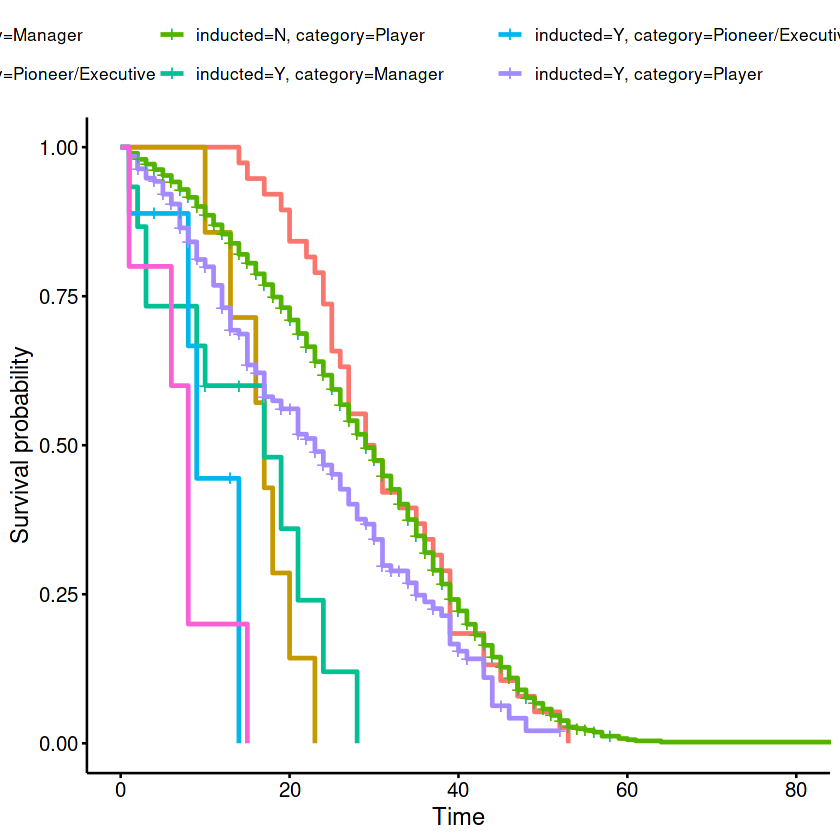

In [107]:
survfit(Surv(life_after_vote, event) ~ inducted + category, data = bb_surv) %>% ggsurvplot

## Machine learning methods in survival analysis

- We have studied three ways of estimating survival:
    - Nonparametric (Kaplan-Meier):
        - Pros: no assumptions about the survival distribution.
        - Cons: cannot accomodate covariates.
    - Semi-parametric (Cox regression):
        - Pros: allows covariates; somewhat interpretable.
        - Cons: proportional hazards assumption may not be realistic.
    - Parametric (Weibull / log-logistic / etc. regression)
        - Pros: very interpretable. straightforward theory.
        - Cons: too simplistic in some cases.

### Random survival forests
- Today we will look at a technique, random survival forests (RSF), that tries to combine the strengths of these three approaches.
- We will estimate the cumulative hazard function $\hat{H}(t)$ (aka CHF) in a way that
    - Places minimal assumptions on the true function $H(t)$, 
    - Can depend on covariates, and is
    - (somewhat) interpretable 

### Bagging
- Bagging stands for "bootstrap aggregation".
- Suppose we have training data $\mathbf{Z}=\{(x_1,y_1),\dots,(x_N,y_N)\}$. Using whatever method, we obtain a prediction function $\hat{y}=\hat{f}(x\mid\mathbf{Z})$.
- Now suppose instead of fitting one training function, we form bootstrap replicates $\mathbf{Z}^*_1,\dots,\mathbf{Z}^*_B$ from the training data and use each to form a prediction function $$\hat{f}(x\mid \mathbf{Z}^*_b),\quad b=1,\dots,B.$$
- The "bagged" prediction function is $$\hat{f}^*(x\mid\mathbf{Z}) = \frac{1}{B}\sum_b \hat{f}(x\mid \mathbf{Z}_b^*)=\frac{1}{B}\sum_b \hat{f}_b(x)$$

### Why bagging works
- Let the true distribution of the the $x_i$ be denoted $\mathcal{P}$.
- The true regression function is $f(x)$, so that $\hat{f}_b(x)=f(x)+\epsilon_b(x)$.
- The average error of the un-bagged predictors is $$E_\text{avg} = \frac{1}{B} \mathbb{E}_x\left\{[\hat{f}_b(x)-f(x)]^2\right\}=\frac{1}{B}\sum_b\mathbb{E}_x[\epsilon_b(x)^2].$$

- If the errors are zero-mean, variance $\sigma^2$ and $\rho=\operatorname{cor}[\epsilon_i(x),\epsilon_j(x)]$ then
he average error of the bagged regression function is $$E_\text{bag}=\mathbb{E}_x \left\{\left[ \frac{1}{B} \sum_b \epsilon_b(x)\right]^2 \right\} = \rho \sigma^2 + \frac{1-\rho}{B}\sigma^2$$
- In particular, if $\rho=0$ then  $E_\text{bag} = E_\text{avg}/ B$.
- Goal is to make $\rho$ small. This is what RF tries to achieve by randomly subsetting the predictors over which splits are computed.

### The random survival forest algorithm
1. Draw $B$ bootstrap samples from the data. For each sample, record also the OOB (out-of-bag) portion of the sample.
2. Grow a survival tree for each bootstrap sample. Keep growing until all terminal nodes have no less than $d_0>0$ unique deaths.
3. Calculate a CHF for each tree. Average to obtain the ensemble CHF.

## Understanding variable importance
- Ensemble methods can be difficult to interpret.
- The authors suggest the following measure of variable importance: 
    - Drop the OOB cases on each tree. Each time the focal predictor $X$ is encountered in a decision rule, pick a random branch.
    - Variable importance is defined as the difference in prediction error between this and the ensemble prediction.

In [67]:
install.packages("randomForestSRC")

Installing package into ‘/home/terhorst/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

also installing the dependencies ‘visNetwork’, ‘data.tree’, ‘DiagrammeR’




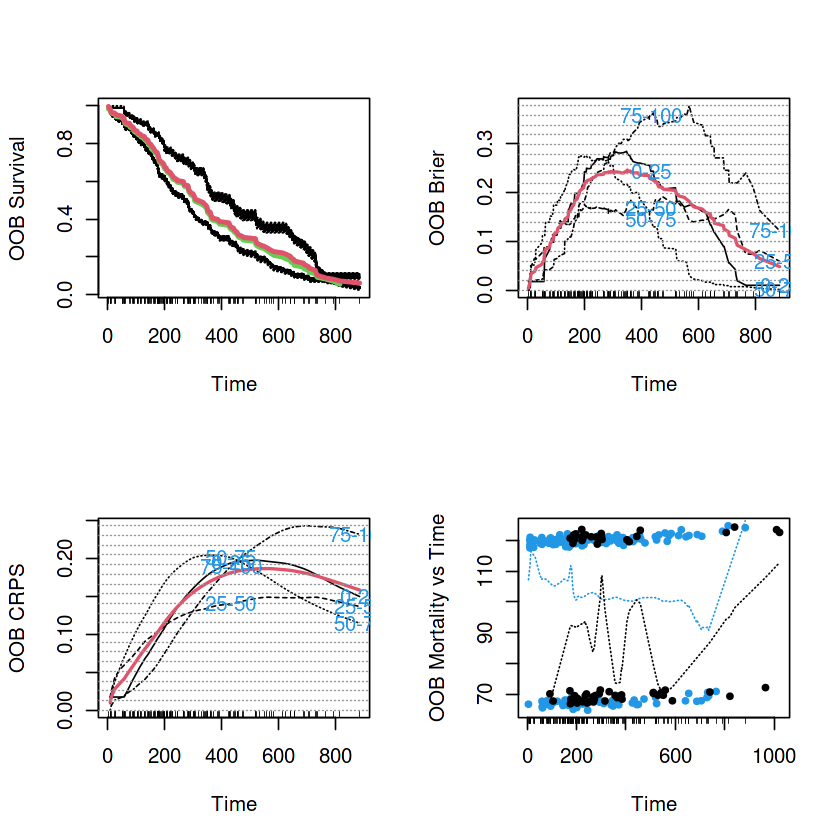

In [73]:
library(randomForestSRC)
d_lung %>% mutate(status = status - 1) %>% 
    rfsrc(Surv(time, status) ~ sex, data = ., nsplit=30, ntree=100) %>% 
    plot.survival